# SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if it doesn't work use this parameter: encoding="windows-1252"

In [15]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [43]:
df.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2316,2575,Ryan Lowell,12/05/17,shot,gun,30.0,M,W,Billings,MT,True,attack,Not fleeing,False
1075,1233,John Henry Neuman,03/02/16,shot,gun,53.0,M,W,Schulter,OK,False,attack,Not fleeing,False
2249,2509,David Airth,15/04/17,shot,knife,56.0,M,W,Newport Beach,CA,False,other,Not fleeing,False
1564,1753,Kenneth Eugene Bonanno,01/08/16,shot,gun,67.0,M,W,Stafford,VA,False,attack,Not fleeing,False
1587,2149,Tommy Seneca,11/08/16,shot,gun,54.0,M,W,Plaquemine,LA,False,attack,Not fleeing,False
939,1084,Nephi Leiataua,13/12/15,shot,knife,30.0,M,O,Thurston County,WA,False,attack,Not fleeing,False
214,309,James Ellis,21/03/15,shot,gun,44.0,M,W,Clarendon,NY,False,attack,Car,False
906,1051,Syed Farook,02/12/15,shot,gun,28.0,M,O,San Bernardino,CA,False,attack,Car,False
1175,1348,Daniel H. Chavez,07/03/16,shot,vehicle,41.0,M,H,Carlsbad,NM,False,other,Car,False
2051,2281,Jose Gonzales Lera,03/02/17,shot,gun,27.0,M,H,Olympic Valley,CA,False,attack,Car,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [6]:
df.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [45]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [49]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


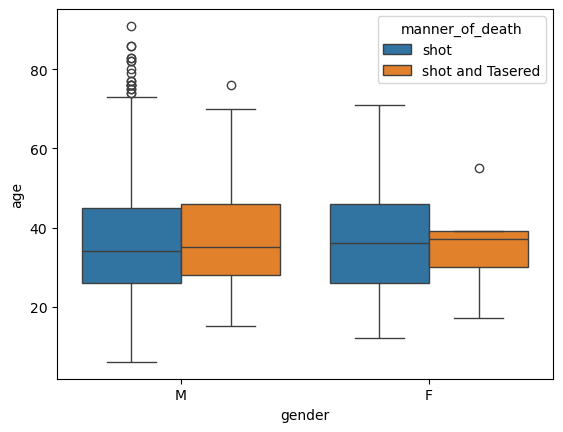

In [55]:
sns.boxplot(data = df, y = "age", x = "gender", hue='manner_of_death'); 

In [52]:
df.dropna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1b: Swarm Plot 

#### Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

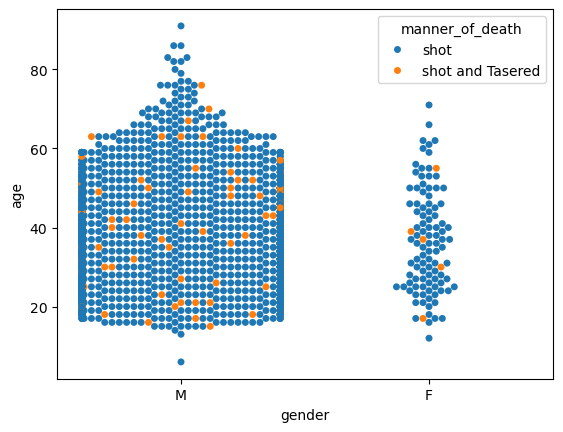

In [56]:
sns.swarmplot(data = df, y = "age", x = "gender", hue='manner_of_death'); 

## 2: Plot 12 most dangerous cities

In [58]:
df.city.value_counts()[:12]

city
Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: count, dtype: int64

In [60]:
df.city.value_counts()[:12].values

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14], dtype=int64)

In [65]:
df.city.value_counts()[:12].index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object', name='city')

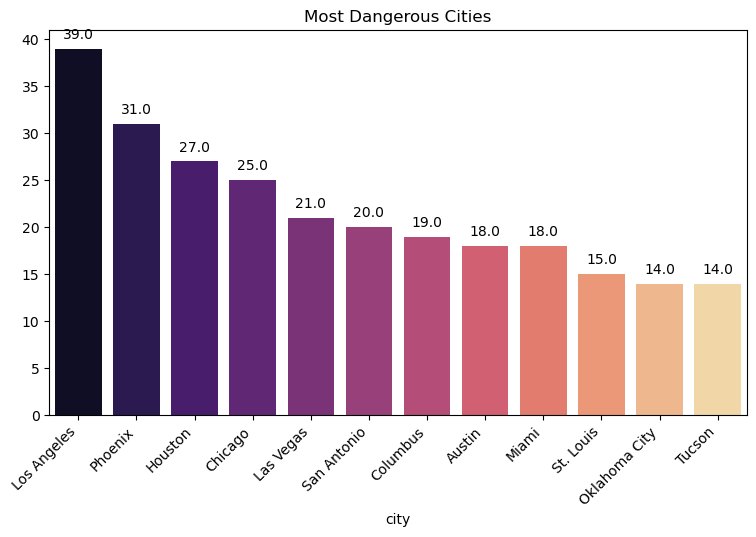

In [89]:
# Filter out rows where 'city' is null
#           df_cleaned = df.dropna(subset=['city'])

# Count the number of incidents in each city
#           city_counts = df_cleaned['city'].value_counts()

# Select the top N most dangerous cities
top_cities = df['city'].value_counts().head(12)

plt.figure(figsize=(9, 5))
ax = sns.barplot(x = top_cities.index, y = top_cities.values, palette='magma')
plt.title('Most Dangerous Cities')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

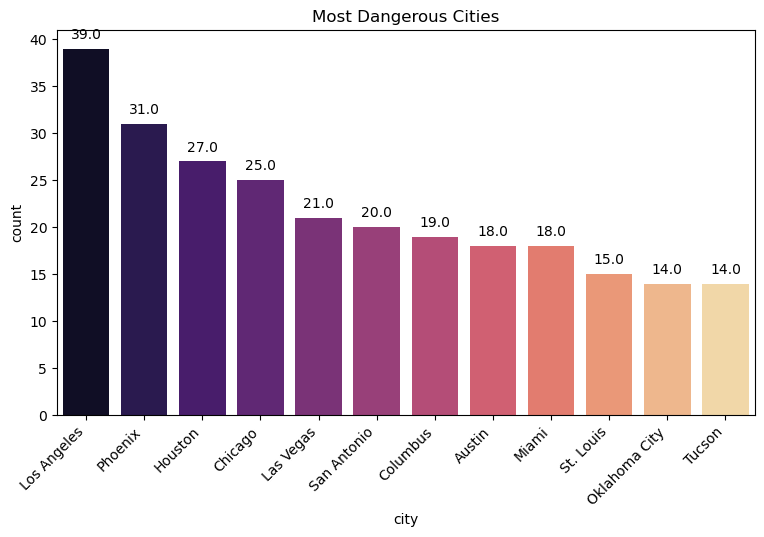

In [83]:
# With countplot

city_counts = df['city'].value_counts().head(12)

plt.figure(figsize=(9, 5))
ax = sns.countplot(x = 'city', data= df, order=city_counts.index ,palette='magma')
plt.title('Most Dangerous Cities')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [84]:
city_counts

city
Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: count, dtype: int64

## 3: Plot 20 most dangerous states

In [85]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [87]:
df.state.value_counts().head(20)

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: count, dtype: int64

''

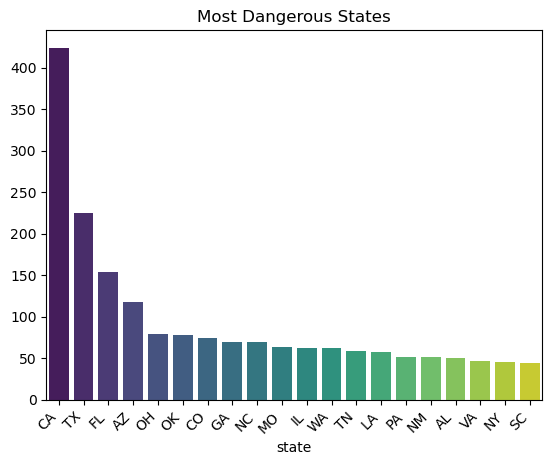

In [97]:
sns.barplot(x= df.state.value_counts().head(20).index, y= df.state.value_counts().head(20).values, palette='viridis')
plt.title('Most Dangerous States')
plt.xticks(rotation=45, ha='right')
;

''

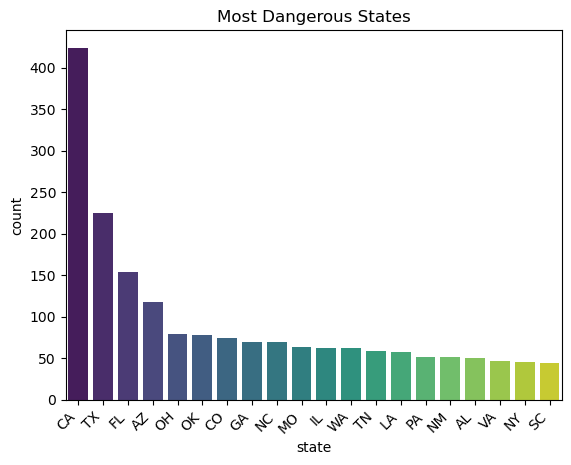

In [101]:
# with countplot

sns.countplot(x= df.state, order= df.state.value_counts().head(20).index, palette='viridis')
plt.title('Most Dangerous States')
plt.xticks(rotation=45, ha='right')
;

## 4: Plot Having mental ilness or not for killed people

In [103]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [147]:
df.signs_of_mental_illness.value_counts(normalize=True)

signs_of_mental_illness
False    0.750296
True     0.249704
Name: proportion, dtype: float64

In [130]:
df.signs_of_mental_illness.value_counts()

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

In [159]:
round(df.signs_of_mental_illness.value_counts(normalize=True)[1], 2)

0.25

In [160]:
df[df.signs_of_mental_illness == True].head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
21,42,Tommy Smith,11/01/15,shot,gun,39.0,M,W,Arcola,IL,True,attack,Not fleeing,False
25,48,Richard McClendon,13/01/15,shot,knife,43.0,M,W,Jourdanton,TX,True,other,Not fleeing,False


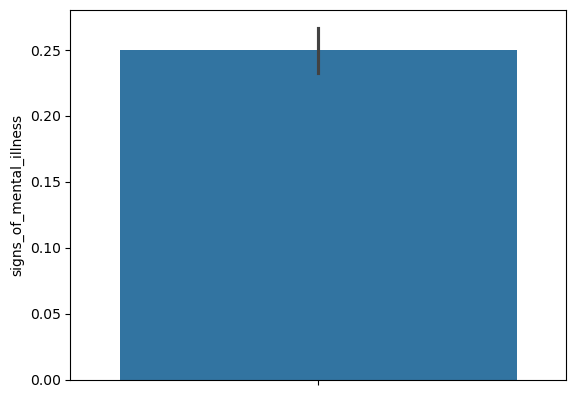

In [167]:
sns.barplot(data= df, y= df.signs_of_mental_illness == True); # bu soru kafayi yedirtti, x axis yazmiyormusuz..

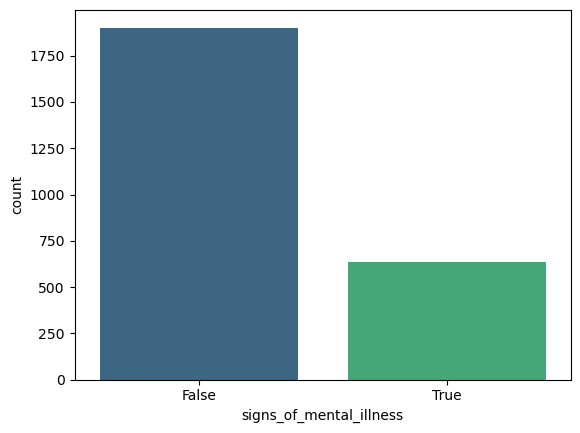

In [128]:
# with seaborn countplot
sns.countplot(x= df.signs_of_mental_illness, palette= 'viridis');

## 5: Plot number of Threat Types

In [144]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [145]:
df.threat_level.value_counts()

threat_level
attack          1611
other            766
undetermined     158
Name: count, dtype: int64

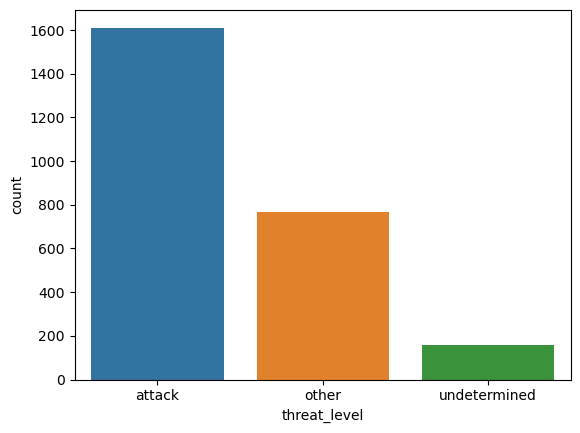

In [151]:
sns.countplot(x= 'threat_level' , data= df, hue='threat_level');

## 6: Plot number of Flee Types

In [150]:
df.flee.value_counts()

flee
Not fleeing    1695
Car             385
Foot            294
Other            96
Name: count, dtype: int64

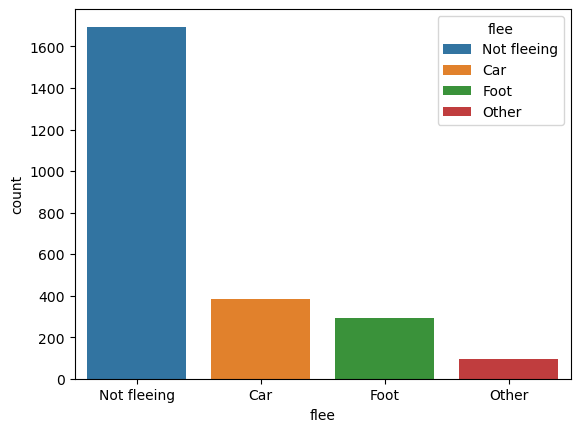

In [152]:
sns.countplot(x= 'flee' , data= df, hue='flee');